<h1>k-nearest neighbors</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_regression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from IPython.display import HTML
%matplotlib inline

In [2]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [3]:
class KNNClassifier:
    def __init__(self, k, metric='minkowski', p=2):
        assert metric in ['euclidean', 'minkowski'], 'Wrong metric'
        self.k = k
        self.p = p
        if metric == 'euclidean':
            self.metric = self._euclidean
        elif metric == 'minkowski':
            self.metric = self._minkowski
            
    @staticmethod
    def _euclidean(x, y):
        return np.sqrt(np.sum((x - y)**2, axis=1))
    
    def _minkowski(self, x, y):
        diff = np.abs(x - y)
        return np.sum(diff**self.p, axis=1)**(1/self.p)
    
    def fit(self, x, y):
        self._x = x
        self._y = y.reshape(-1, 1)
        self.unique_classes = np.unique(y)
        return self
    
    def predict(self, x):
        self.result = []
        for sample in x:
            metrics = self.metric(sample, self._x).reshape(-1, 1)
            metrics_with_target = np.hstack((metrics, self._y))
            idxs = np.argsort(metrics_with_target[:, 0])
            metrics_with_target = metrics_with_target[idxs]
            
            k_neib = metrics_with_target[:self.k, 1]
            amount_of_classes = []
            for cls in self.unique_classes:
                n_of_the_class = np.sum(k_neib == cls)
                amount_of_classes.append(n_of_the_class)
                
            self.result.append(np.argmax(amount_of_classes))
        return np.array(self.result)
    
    def __repr__(self):
        return f'KNNClassifier(k={self.k})'

In [4]:
X, y = make_moons(1000, noise=0.2, random_state=42)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
knn = KNNClassifier(1, metric='minkowski', p=1)

In [7]:
knn.fit(x_train, y_train)

KNNClassifier(k=1)

In [8]:
accuracy_score(y_test, knn.predict(x_test))

0.9606060606060606

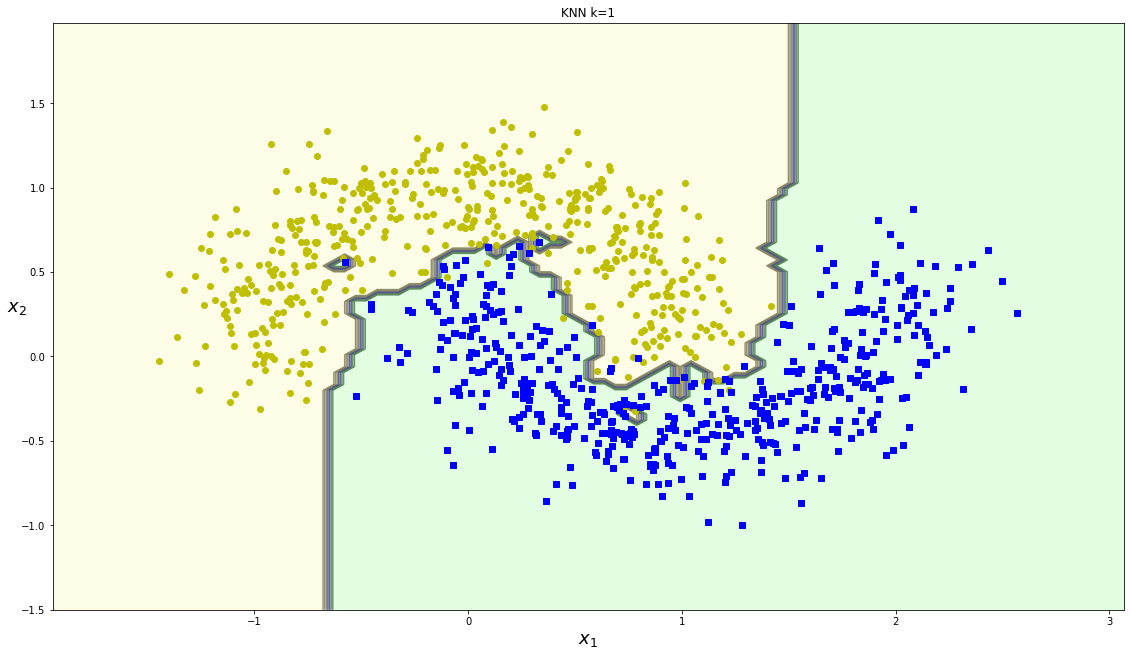

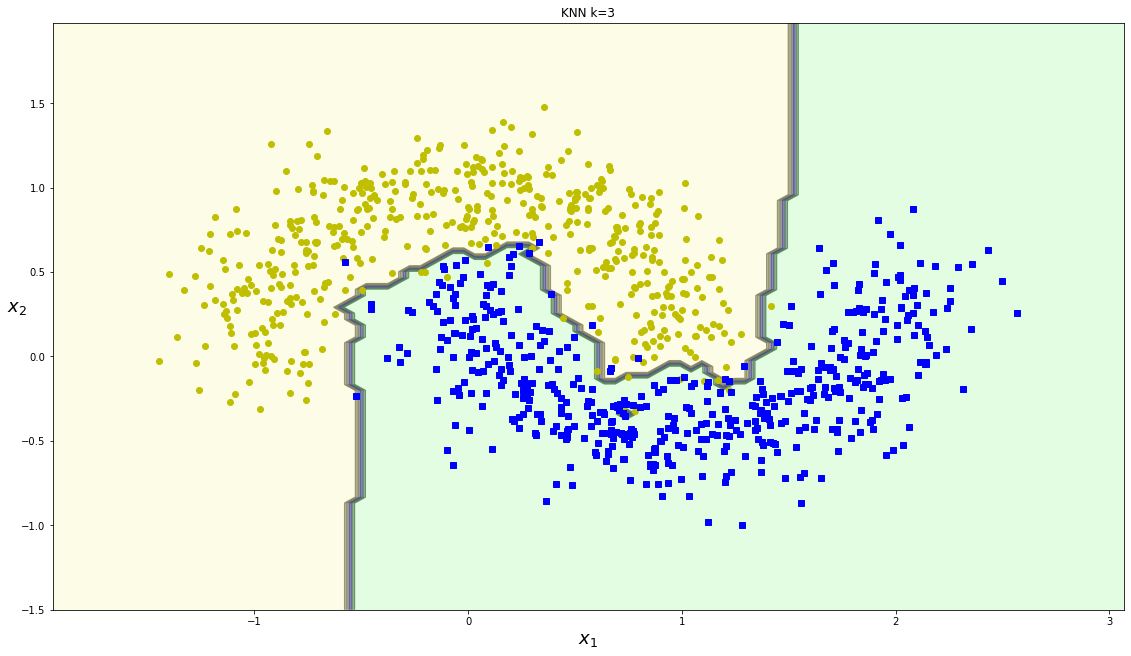

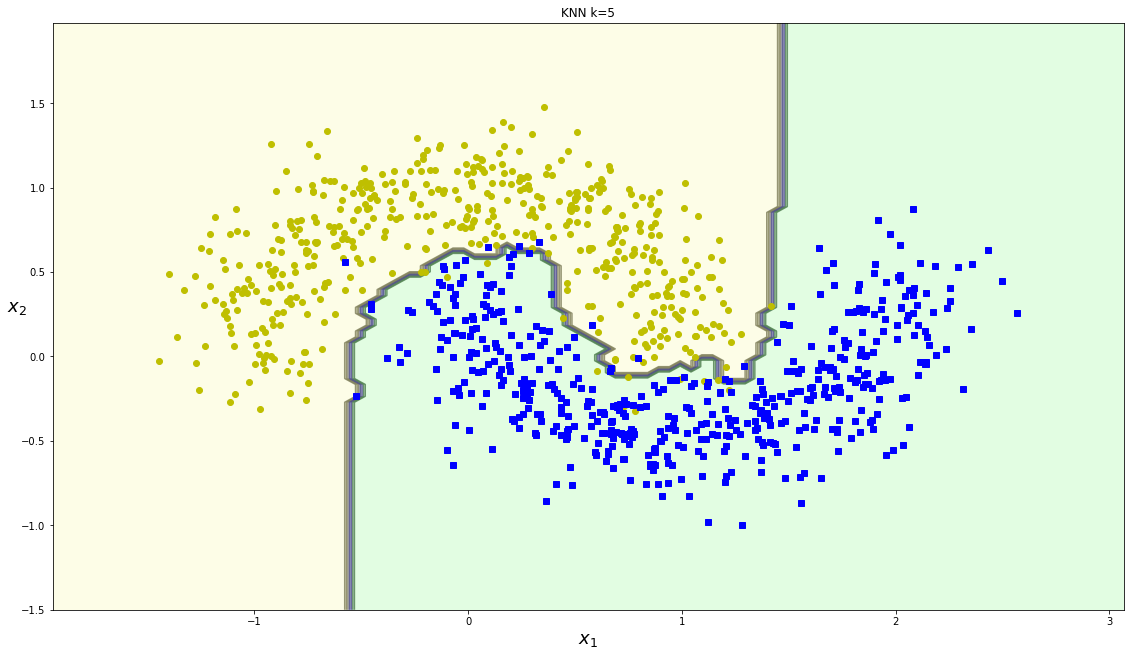

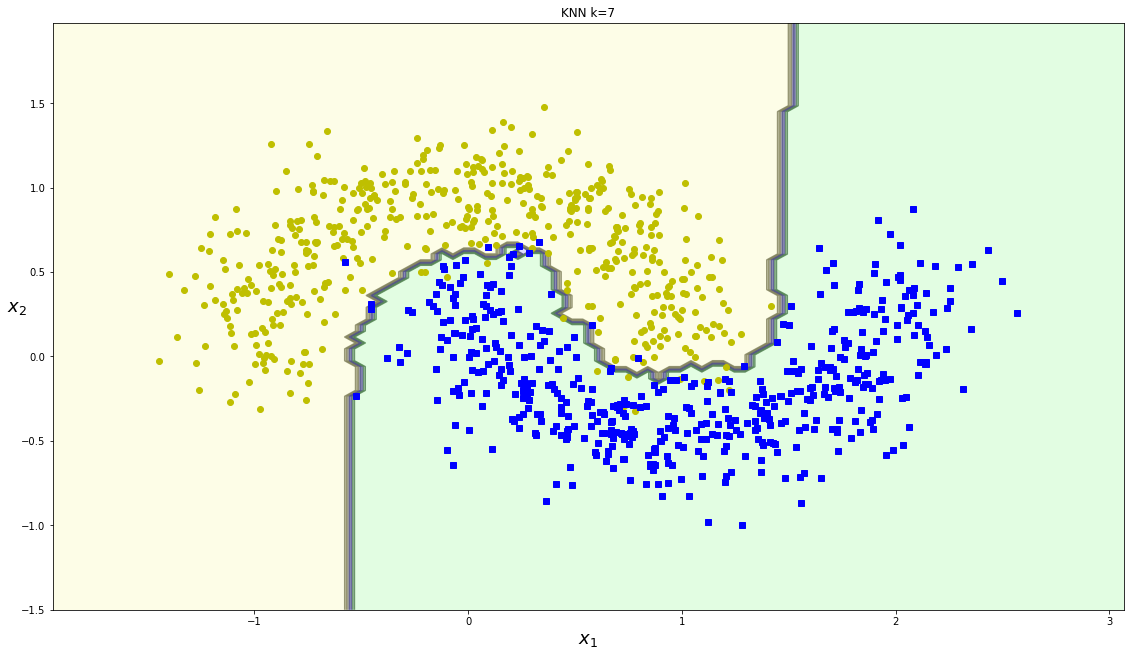

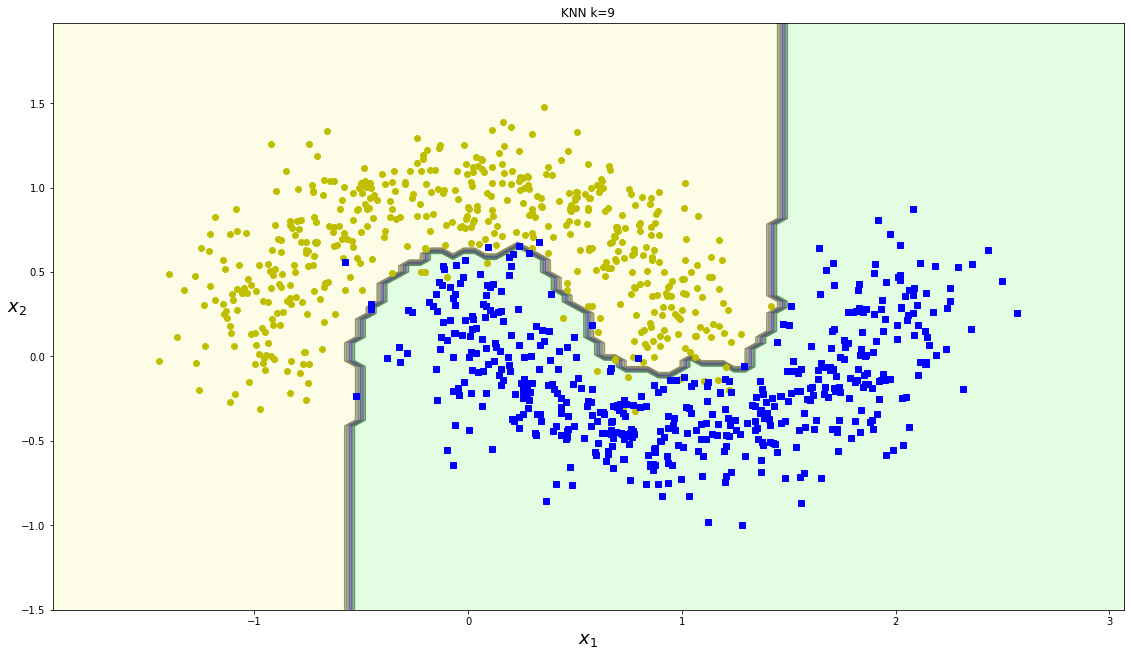

Wall time: 19.6 s


In [9]:
%%time
for k in [1, 3, 5, 7, 9]:
    knn = KNNClassifier(k, p=1)
    knn.fit(x_train, y_train)
    plt.figure(figsize=(19.20, 10.80))
    plot_decision_boundary(knn, X, y, axes = [X[:, 0].min() - 0.5, X[:, 0].max() + 0.5,\
                                               X[:, 1].min() - 0.5, X[:, 1].max() + 0.5])
    plt.title(f'KNN k={k}')
    plt.show()
    plt.pause(1)

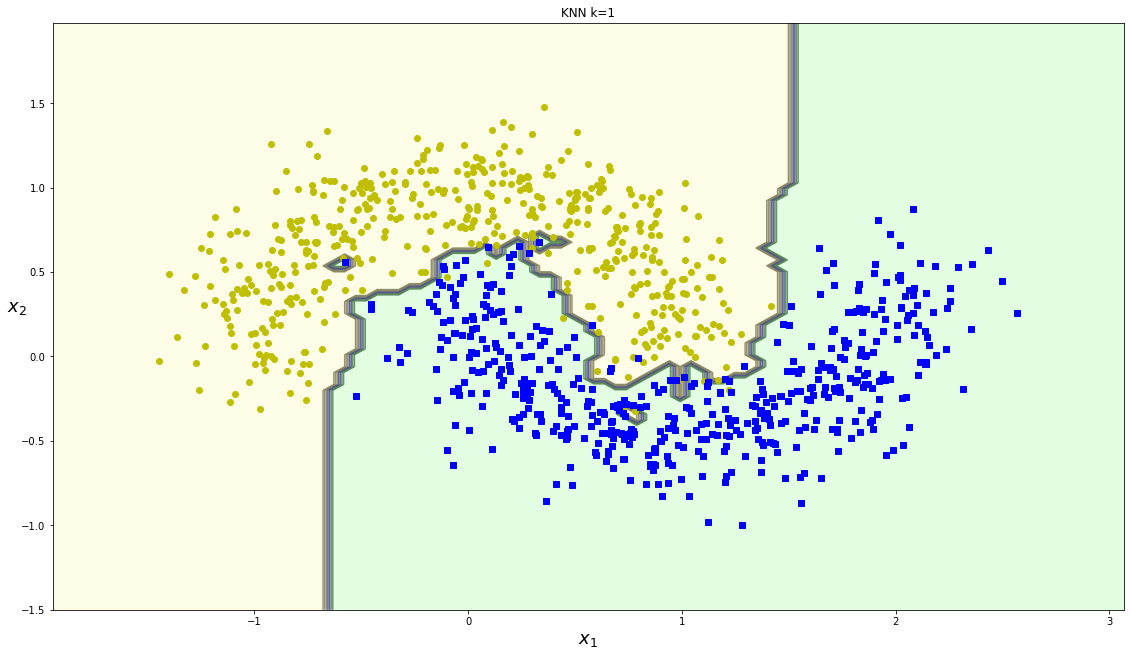

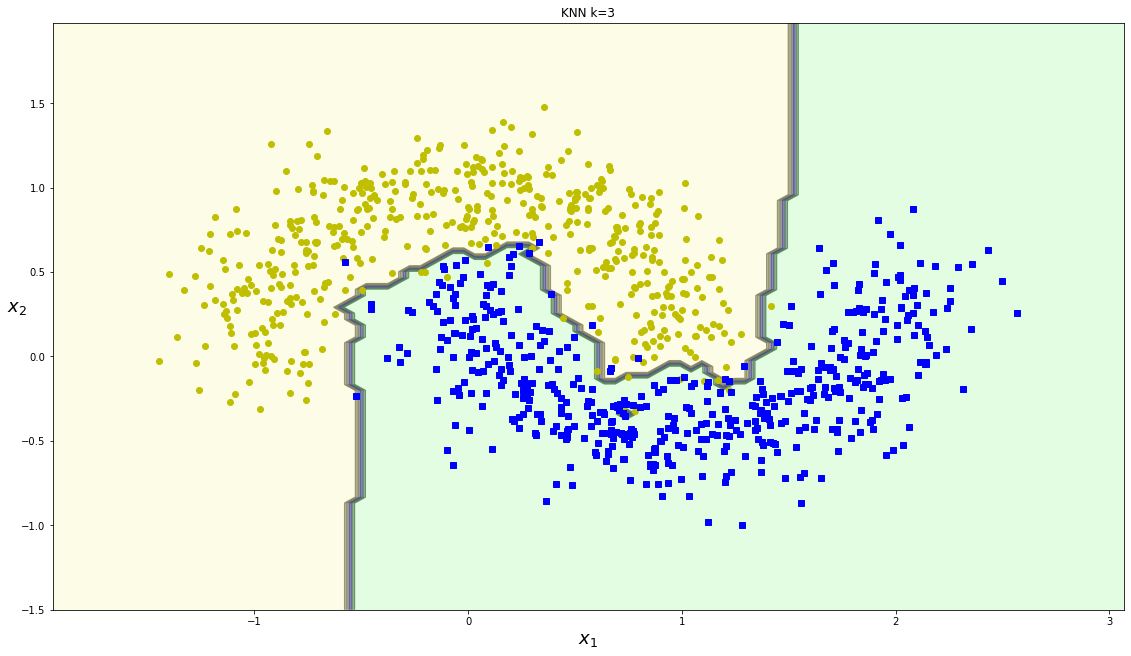

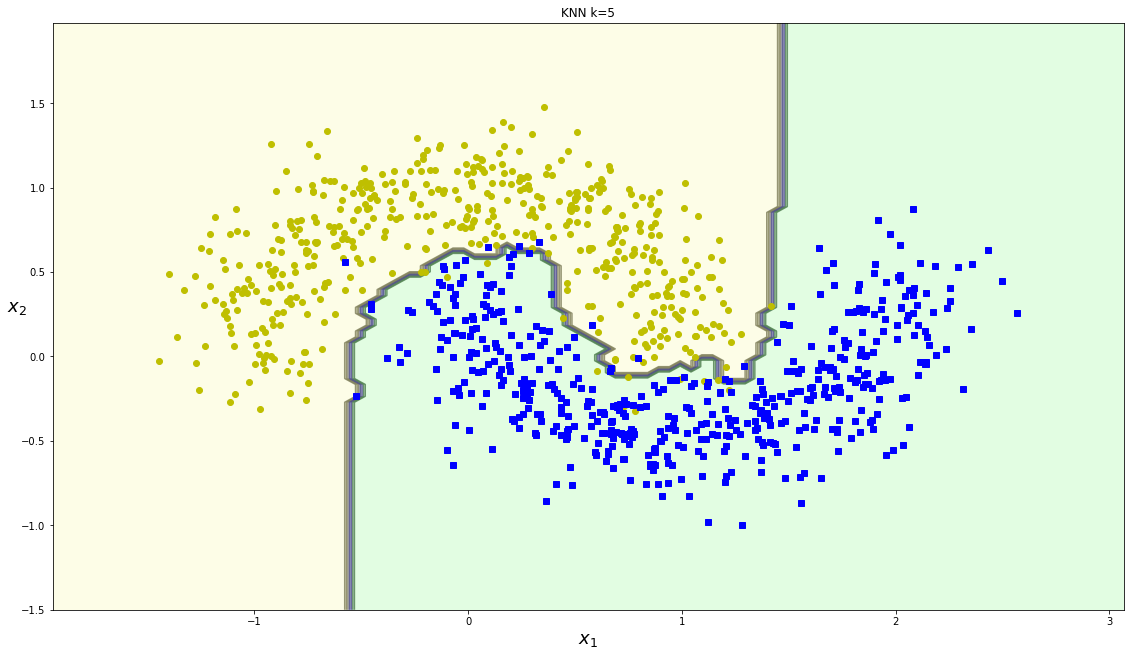

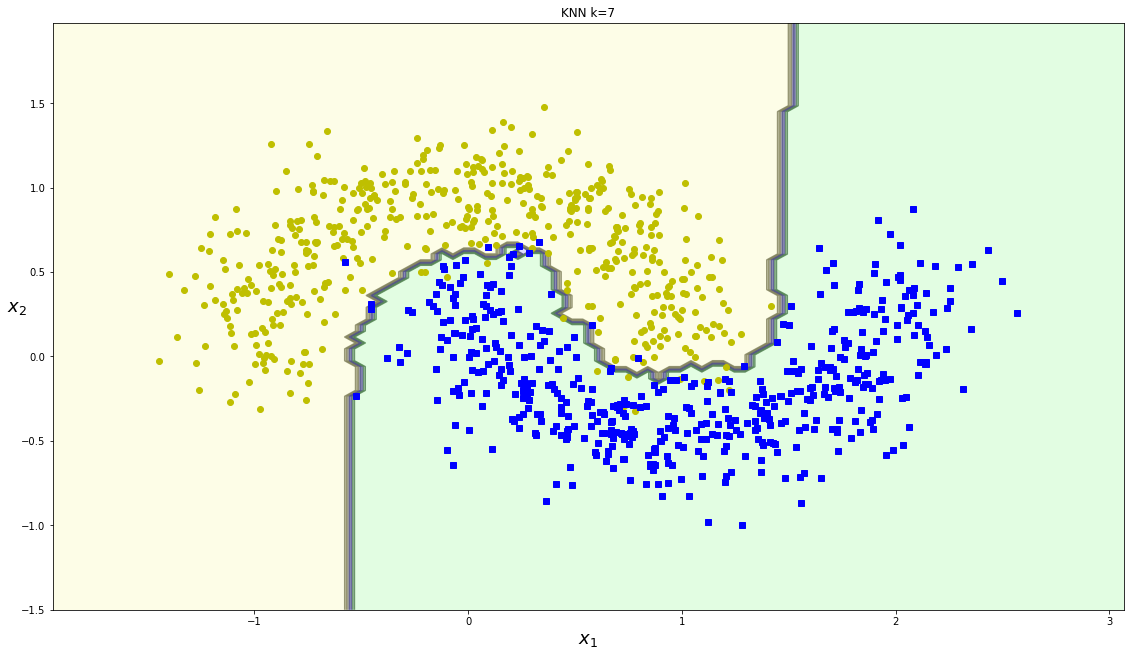

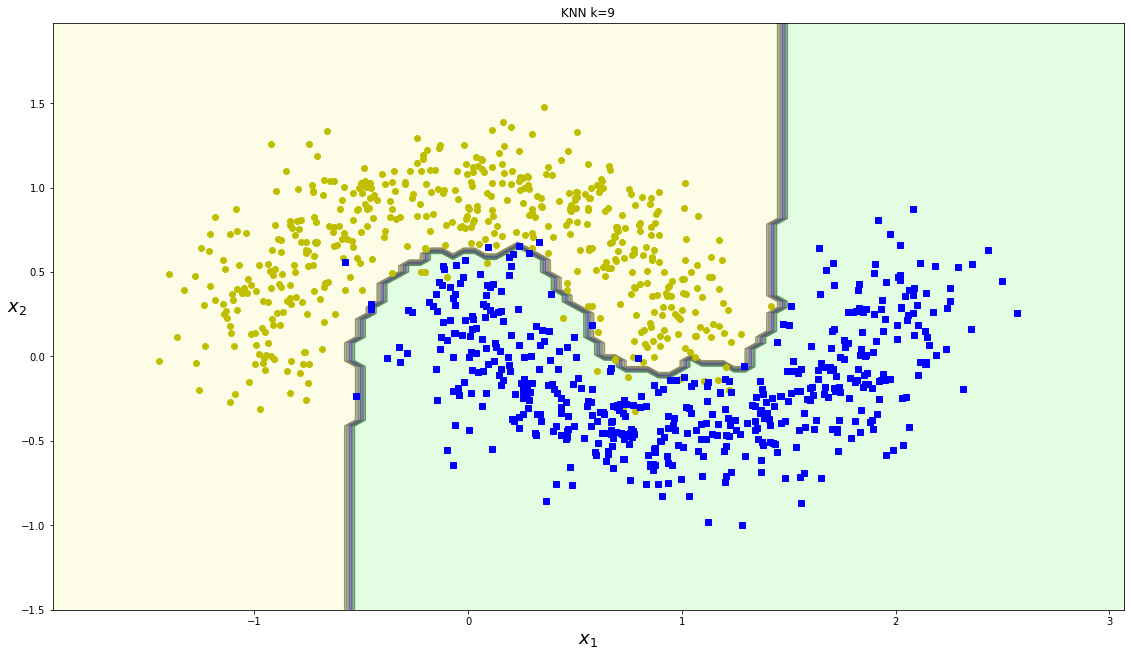

Wall time: 10.7 s


In [10]:
%%time
for k in [1, 3, 5, 7, 9]:
    sknn = KNeighborsClassifier(n_neighbors=k, p=1)
    sknn.fit(x_train, y_train)
    plt.figure(figsize=(19.20, 10.80))
    plot_decision_boundary(sknn, X, y, axes = [X[:, 0].min() - 0.5, X[:, 0].max() + 0.5,\
                                               X[:, 1].min() - 0.5, X[:, 1].max() + 0.5])
    plt.title(f'KNN k={k}')
    plt.show()
    plt.pause(1)

In [11]:
(knn.predict(x_test) == sknn.predict(x_test)).all() == True

True

In [12]:
class KNNRegressor:
    def __init__(self, k, metric='minkowski', p=2):
        assert metric in ['euclidean', 'minkowski'], 'Wrong metric'
        self.k = k
        self.p = p
        if metric == 'euclidean':
            self.metric = self._euclidean
        elif metric == 'minkowski':
            self.metric = self._minkowski
            
    @staticmethod
    def _euclidean(x, y):
        return np.sqrt(np.sum((x - y)**2, axis=1))
    
    def _minkowski(self, x, y):
        diff = np.abs(x - y)
        return np.sum(diff**self.p, axis=1)**(1/self.p)
    
    def fit(self, x, y):
        self._x = x
        self._y = y.reshape(-1, 1)
        return self
    
    def predict(self, x):
        self.result = []
        for sample in x:
            metrics = self.metric(sample, self._x).reshape(-1, 1)
            metrics_with_target = np.hstack((metrics, self._y))
            idxs = np.argsort(metrics_with_target[:, 0])
            metrics_with_target = metrics_with_target[idxs]
            
            k_neib = metrics_with_target[:self.k, 1]

            self.result.append(np.mean(k_neib))
            
        return np.array(self.result)
    
    def __repr__(self):
        return f'KNNRegressor(k={self.k})'

In [13]:
X, y = make_regression(1000, 10, random_state=42)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
knn_reg = KNNRegressor(10)

In [16]:
knn_reg.fit(x_train, y_train)

KNNRegressor(k=10)

In [17]:
r2_score(y_test, knn_reg.predict(x_test))

0.7575772604764462

In [18]:
sknn_reg = KNeighborsRegressor(10)

In [19]:
sknn_reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [20]:
r2_score(y_test, sknn_reg.predict(x_test))

0.7575772604764462

In [21]:
with open('./style.css') as f:
    style = f.read()
HTML(style)